In [6]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
from datetime import datetime
from sklearn import svm
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.utils import shuffle



In [7]:
data = pd.read_csv("/Users/king/GitHub/IoT_ver/SVMdata.csv")
for i in range(10):
    data = shuffle(data)
#拿出資料90%當作訓練集
par = np.random.rand(len(data)) < 0.9
data_train = data[par]
#剩下的當作test集
data_test = data[~par]

train_data = data.values
test_data = data.values
#前4列的資料進行訓練
X_train = train_data[:,0:4]
X_train=X_train.astype(float)
#第5列之後為目標變量
Y_train = train_data[:,4:]
Y_train= Y_train.astype(float)
#前4列為測試集
X_test = test_data[:,0:4]
X_test=X_test.astype(float)
#第5列之後為訓練目標變量
Y_test = test_data[:,4:].flatten() 
Y_test=Y_test.astype(float)
print(data)


             ts  door_state  sphone_signal  label  type
15182  1.109592           0              0      1     1
12222  1.101295           0              0      1     1
23987  1.189439           0              0      1     4
41745 -0.877473           0              0      0     3
51903 -0.877596           1              1      0     3
...         ...         ...            ...    ...   ...
56741 -0.790124           0              0      0     3
18290  1.078073           0              0      1     2
21279 -0.748302           0              0      0     3
6548   1.100125           0              0      1     1
47173 -0.877718           0              0      0     3

[59587 rows x 5 columns]


In [78]:
data.head(10)

,ts,door_state,sphone_signal,label,type
0,1.096115,0,0,1,1
1,1.096120,0,0,1,1
2,1.096124,0,0,1,1
3,1.096129,0,0,1,1
4,1.096138,0,0,1,1
5,1.096142,0,0,1,1
6,1.096147,0,0,1,1
7,1.096152,1,1,1,1
8,1.096156,0,0,1,1
9,1.096161,0,0,1,1


In [8]:
rbfmodel=svm.SVC(kernel='rbf',gamma=0.7,C=1)
rbfmodel.fit(X_train,Y_train)

/Users/king/Library/Python/3.9/lib/python/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC(C=1, gamma=0.7)

In [9]:
#混淆矩陣（Confusion Matrix）：展示模型預測結果的分類情況。以矩陣形式表示，包含真實類別和預測類別之間的對應關係。
confusion_mat = confusion_matrix(Y_train, Y_test)
print("Confusion Matrix:")
print(confusion_mat)
#F1 分數（F1 Score）：精確率和召回率的調和平均值，綜合考慮了模型的準確性和完整性。
f1 = f1_score(Y_train, Y_test,average='weighted')
print("F1 Score:", f1)
#召回率（Recall）：模型對於實際正例的預測能力。即預測為正例且與實際結果相符的比例。
recall = recall_score(Y_train, Y_test,average='weighted')
print("Recall:", recall)
#精確率（Precision）：模型對於正例的預測準確率。即預測為正例且與實際結果相符的比例。
precision = precision_score(Y_train, Y_test,average='weighted')
print("Precision:", precision)


Confusion Matrix:
[[ 5000     0     0     0     0     0     0     0]
 [    0  5000     0     0     0     0     0     0]
 [    0     0  5000     0     0     0     0     0]
 [    0     0     0 35000     0     0     0     0]
 [    0     0     0     0  5000     0     0     0]
 [    0     0     0     0     0  2902     0     0]
 [    0     0     0     0     0     0   529     0]
 [    0     0     0     0     0     0     0  1156]]
F1 Score: 1.0
Recall: 1.0
Precision: 1.0


In [10]:
accuracy = rbfmodel.score(X_test, Y_test)
print("測試資料集的準確度 = {:.4f}".format(accuracy))

測試資料集的準確度 = 0.9926


In [11]:
#knn_model = KNeighborsClassifier(n_neighbors = 10, weights='uniform', algorithm='auto', leaf_size=30, p=2, metric='minkowski', metric_params=None, n_jobs=1)
accuracy = cross_val_score(rbfmodel, X_test, Y_test, cv=10, scoring="accuracy")
print(accuracy)
print(accuracy.mean()*100,'%')

[0.99228058 0.99026682 0.99211277 0.99160933 0.99446216 0.99647592
 0.9912737  0.99295065 0.98992951 0.99211145]
99.23472896728968 %


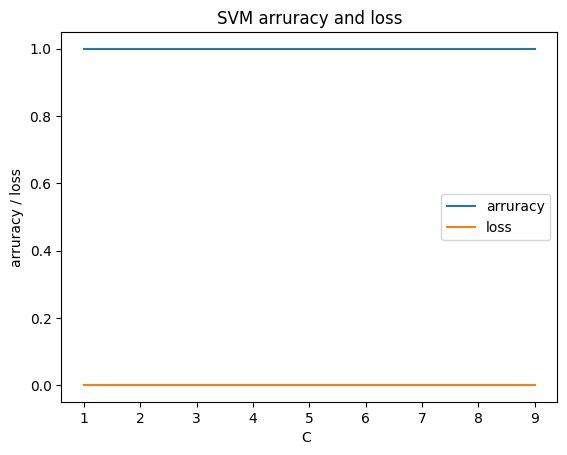

In [83]:

# 創建不同的 C 值範圍
C_values = np.arange(1, 10, 1)
accuracies = []
errors = []

# 進行交叉驗證，計算每個 C 值對應的正確率和錯誤率
for C in C_values:
    rbfmodel = svm.SVC(kernel='rbf', gamma=0.7, C=10)
    scores = cross_val_score(rbfmodel, X_test, Y_test, cv=5)
    accuracy = np.mean(scores)
    error = 1 - accuracy
    accuracies.append(accuracy)
    errors.append(error)

# 繪製正確率和錯誤率曲線
plt.plot(C_values, accuracies, label='arruracy')
plt.plot(C_values, errors, label='loss')
plt.xlabel('C ')
plt.ylabel('arruracy / loss')
plt.title('SVM arruracy and loss')
plt.legend()
plt.show()